In [1]:
# Parameters
survey = "gama"


In [2]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#gold_dir = os.environ['HOME'] + '/data/{}/randoms/'.format(version)
#randoms_dir = os.environ['HOME'] + '/data/{}/randoms/'.format(version)
#gold_dir
#randoms_dir

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [5]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [6]:
dryrun  = False
version = 'latest'
survey  = 'gama'

##  kE Catalog

In [7]:
fpath = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
gama_kE = Table.read(fpath)
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
123281,587724649255010654,175.33684943,-2.47765272,18.508278,0.07775,4,G12_Y6_051_026,6,20.005444,19.001768,18.43343,18.128056,17.895376,247.47013288954915,36.967613957681905,G12,-228.64338173556078,18.64987105624686,-9.926295790157884,228.46859526203986,-20.569740887948782,-10.15538225743375,0.5683384,18.508278,0.5947095088397611,0,4,-0.12145210218178723,-0.14782321685650926,0.09386676219384957,0.1144879373509757,0.5477172190079129,2.12,-0.075417496,-0.16482998,-18.477785330545366,-18.388372842502058,-18.553202826809347,36.98606322361177,36.896650735568464,-0.12191415624145123,-0.14852937903794905,0.09481072212074988,0.11664591067571423,-18.47872929047227
508557,587729971786940946,217.19946129,-1.5769885,19.355307,0.05606,4,G15_Y2_003_140,6,21.191936,20.02943,19.494352,19.263758,18.98756,175.59008312472253,36.22249992214916,G15,-132.38905442382938,-100.48679980208547,-4.57575189376695,133.2237844640646,99.37123117196604,-4.709335360060893,0.53507805,19.355307,0.5782485855455651,0,4,-0.14054202778484734,-0.18371256462435775,0.07198516985644665,0.07291179564533268,0.5341514229171687,2.12,-0.054378204,-0.1188472,-16.884800262591718,-16.820331267855046,-16.939178466639397,36.24010688795793,36.17563789322126,-0.14307149449320722,-0.18780013889648303,0.0736533838689939,0.07737515081718024,-16.886468476604264
278187,587726031189836412,214.37299238,1.09355577,19.774502,0.15595,4,G15_Y4_232_353,5,20.959604,20.024252,19.66941,19.422945,19.348568,523.9983853005301,38.59664974354315,G15,-374.0809586860361,-255.8796604306829,8.651329521932924,376.2255507132008,252.7284789081164,8.274099070057625,0.35484123,19.774502,0.2744785820574246,0,2,-0.12126437671598772,-0.04090172647360765,0.04493669967820002,0.12009801309513066,0.279679918882874,2.12,-0.15127149,-0.33061397,-18.71581315044143,-18.536470671927713,-18.867084642684244,38.490314950978544,38.310972472464826,-0.06760715201130102,0.02781821076256147,0.1491177263509001,0.29299350047622474,-18.819994177114133
279688,587726031693611569,138.75098304,1.00368548,19.595543,0.22079,4,G09_Y3_019_335,5,21.959982,20.51256,19.575455,19.184067,18.88176,772.8098224309778,39.44036316667786,G9,-475.87936380472416,417.32055725469064,11.088797612929003,472.3681041336928,-421.3030622273456,10.615167924119861,0.9371052,19.595543,0.6781044179507406,0,4,-0.011684348380550533,0.2473164125017167,0.21020627338842263,0.5403093953042624,0.6070020569171681,2.12,-0.2141663,-0.46807477,-19.840860233842797,-19.58695176356978,-20.05502653235144,39.43640314155764,39.18249467128462,-0.03474891025200881,0.20273170312397315,0.1819759681101923,0.4679069928376364,-19.812629928564565
226964,587726014008983767,211.54730519,1.27628899,18.608667,0.11458,4,G15_Y1_AN1_203,6,20.638006,19.155218,18.559296,18.18614,17.953371,374.3828461141339,37.866579707693525,G15,-286.18230568118366,-175.6979175476261,7.4816115560120835,287.6553704863744,173.2878838799524,7.193188291762481,0.59592247,18.608667,0.5750730352171625,0,4,-0.09401096449323777,-0.07316152961762677,0.11797768023358156,0.182

In [8]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

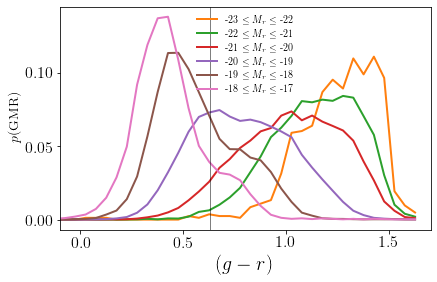

In [9]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

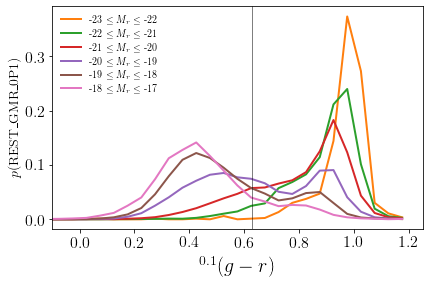

In [10]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

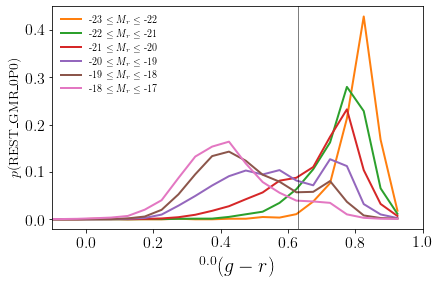

In [11]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

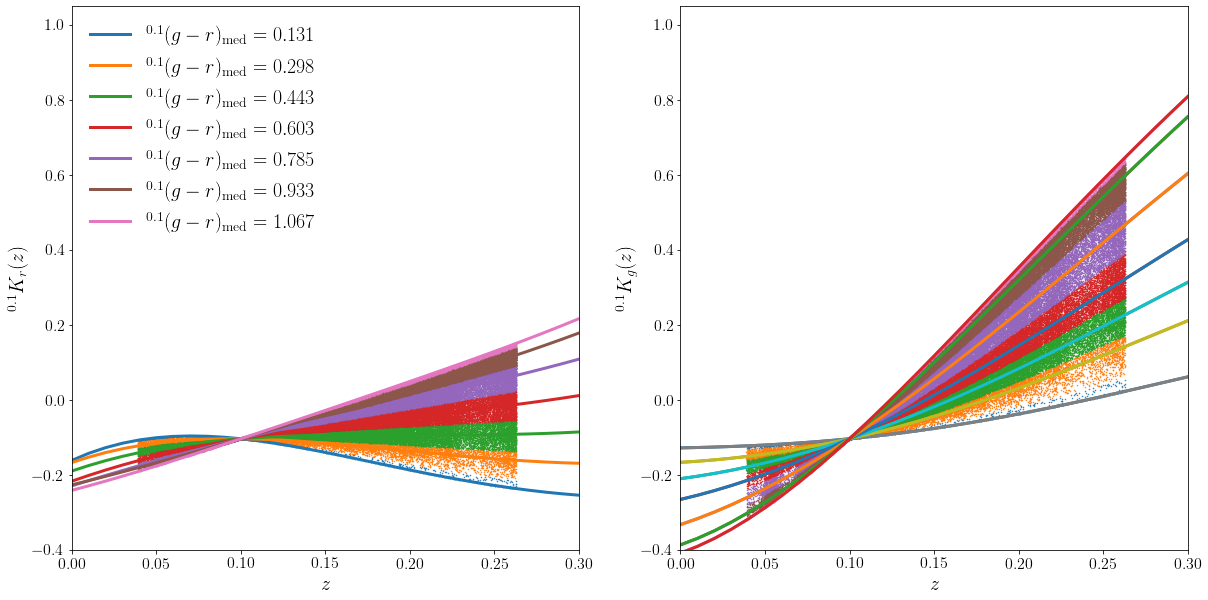

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

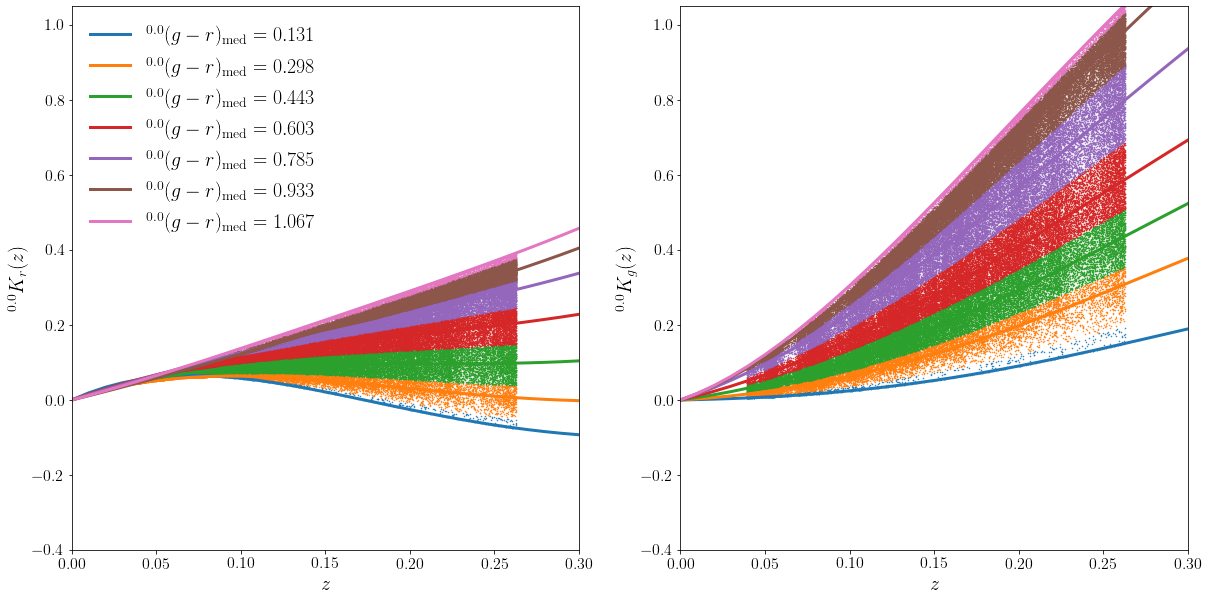

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

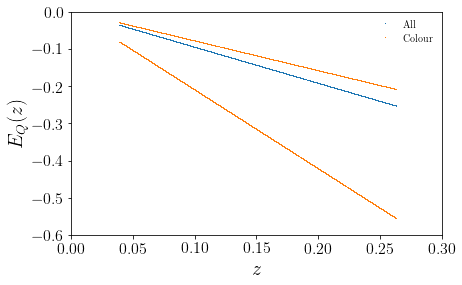

In [14]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

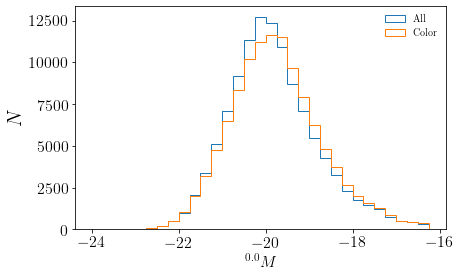

In [15]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

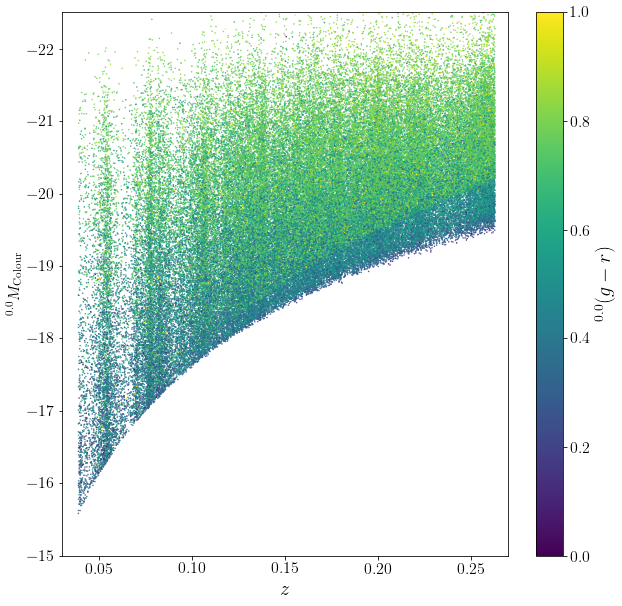

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

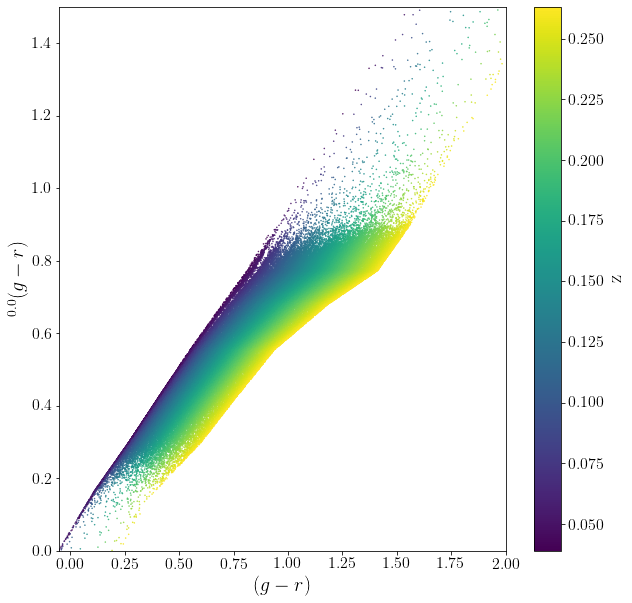

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='z')

# Done.